In [26]:
# initialization
import matplotlib.pyplot as plt
import numpy as np
    
# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
# import basic plot tools
from qiskit.visualization import plot_histogram

In [27]:
n = 2
grover_circuit = QuantumCircuit(n)

In [28]:
def initialize_s(qc, qubits):
    # Apply an H gate to qubits in qc
    for q in qubits:
        qc.h(q)
    return qc

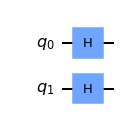

In [29]:
grover_circuit = initialize_s(grover_circuit, [0, 1])
grover_circuit.draw("mpl")

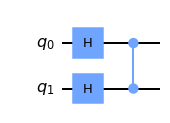

In [30]:
# next we need to apply the oracle for |w> = |11> (specific to 2 qubits)
# Oracle
grover_circuit.cz(0, 1)
grover_circuit.draw("mpl")


In [31]:
# Us(the diffuser) now has to be applied
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()
# Finished circuit

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

In [32]:
# checking if we have the correct statevector
sim = Aer.get_backend("aer_simulator")
# we need to make a copy of the circuit with the "save_statevector"
# instruction to run on the Aer sim
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()

qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()

type(statevec)

numpy.ndarray

In [33]:
print(statevec)

[-7.49879891e-33+0.0000000e+00j  0.00000000e+00+1.2246468e-16j
  7.49879891e-33+1.2246468e-16j  1.00000000e+00-2.4492936e-16j]


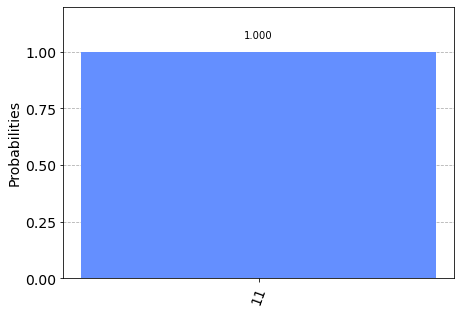

In [34]:
# [0 0 0 1]
# amplitude of every cell besides the |11> cell is 0
# indicaating that there is a 100% chance of measuring |11>
grover_circuit.measure_all()
aer_sim = Aer.get_backend("aer_simulator")
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [36]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibmq_manila


In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval = 2)

Job Status: job is queued (17)    